In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('titanic_train.csv')

## Explore Data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


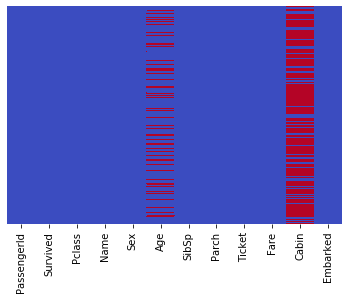

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
sns.set_style('whitegrid')

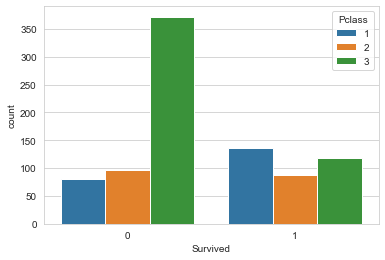

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=train)

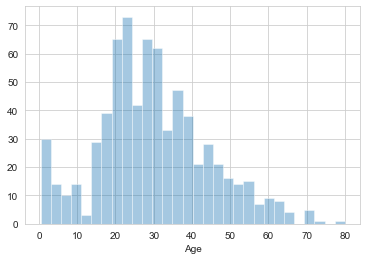

In [20]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

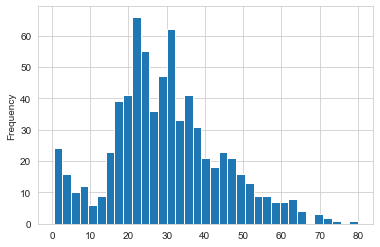

In [22]:
train['Age'].plot.hist(bins=35)

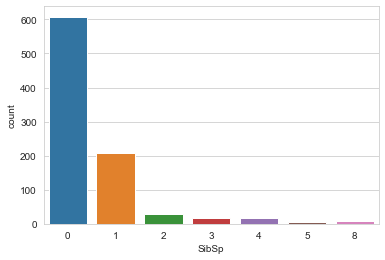

In [23]:
sns.countplot(x='SibSp',data=train)

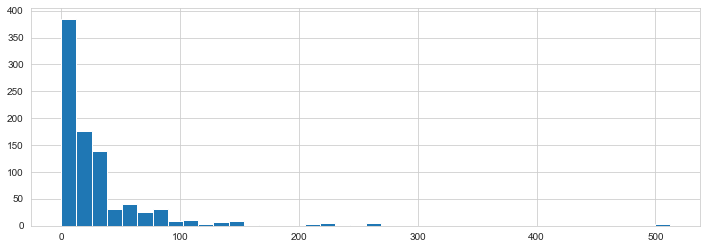

In [25]:
train['Fare'].hist(bins=40,figsize=(12,4))

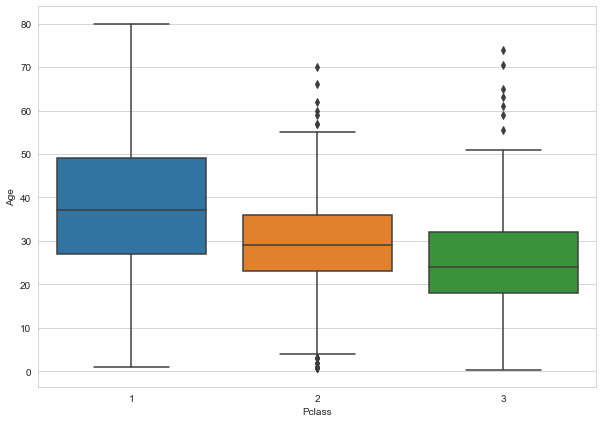

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

## Data Cleaning

In [30]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

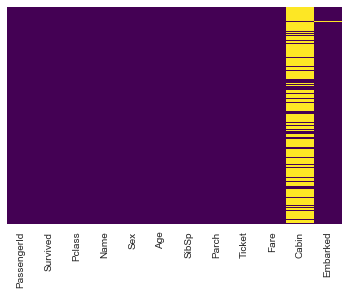

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
train.drop('Cabin',axis=1,inplace=True)

In [36]:
train.dropna(inplace=True)

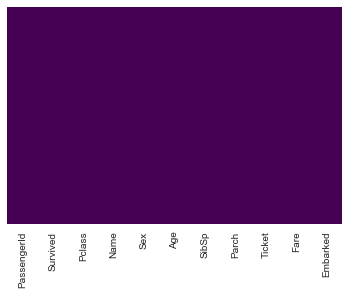

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Create Dummy Variable for Categorical Variable

In [39]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [40]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [43]:
train = pd.concat([train,sex,embark],axis=1)

In [45]:
train.drop(['Name','Sex','Embarked','Ticket'],inplace=True,axis=1)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
train.drop('PassengerId',axis=1,inplace=True)

In [49]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Model

In [52]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [53]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lgmodel = LogisticRegression()

In [59]:
lgmodel.fit(X_train,y_train)

C:\Users\zhong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
predictions = lgmodel.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       216
           1       0.77      0.67      0.72       140

    accuracy                           0.79       356
   macro avg       0.79      0.77      0.78       356
weighted avg       0.79      0.79      0.79       356



In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test,predictions)

array([[188,  28],
       [ 46,  94]], dtype=int64)